In [1]:
"""
Python 3 function to convert rumour annotations into True, False, Unverified
"""

def convert_annotations(annotation, string = True):
    if 'misinformation' in annotation.keys() and 'true'in annotation.keys():
        if int(annotation['misinformation'])==0 and int(annotation['true'])==0:
            if string:
                label = "unverified"
            else:
                label = 2
        elif int(annotation['misinformation'])==0 and int(annotation['true'])==1 :
            if string:
                label = "true"
            else:
                label = 1
        elif int(annotation['misinformation'])==1 and int(annotation['true'])==0 :
            if string:
                label = "false"
            else:
                label = 0
        elif int(annotation['misinformation'])==1 and int(annotation['true'])==1:
            print ("OMG! They both are 1!")
            print(annotation['misinformation'])
            print(annotation['true'])
            label = None
            
    elif 'misinformation' in annotation.keys() and 'true' not in annotation.keys():
        # all instances have misinfo label but don't have true label
        if int(annotation['misinformation'])==0:
            if string:
                label = "unverified"
            else:
                label = 2
        elif int(annotation['misinformation'])==1:
            if string:
                label = "false"
            else:
                label = 0
                
    elif 'true' in annotation.keys() and 'misinformation' not in annotation.keys():
        #print ('Has true not misinformation')
        label = None
    else:
        #print('No annotations')
        label = None
           
    return label


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown as md
import json


tweetSet='twitter16'
# Define the path to your text file
#file_path = './Data/twitter16/label.txt'
file_path = './Data/PHEME_veracity/all-rnr-annotated-threads/gurlitt-all-rnr-threads/rumours/536826643122503680/annotation.json'


# Open and read the JSON file
with open(file_path, 'r') as file:
    data = json.load(file)

# Create a dictionary (hashtable) and add the key-value pairs
my_dict = {}
for key, value in data.items():
    my_dict[key] = value
    
print(my_dict['is_rumour'])
my_dict.keys


rumour


<function dict.keys>

In [3]:
convert_annotations(my_dict)

'true'

In [4]:
import os
# Create a DataFrame from the lists
df = pd.DataFrame(columns=['TweetID', 'IsRumour', 'IsTrue','Path','CreatedAt'])
df
count=0
Incidentdirectory = './Data/PHEME_veracity/all-rnr-annotated-threads/'
for subdirectoryIncident in os.listdir(Incidentdirectory):
    subdirectoryIncident_path = os.path.join(Incidentdirectory, subdirectoryIncident)
    if os.path.isdir(subdirectoryIncident_path):
        rmourOrnonrumour=['rumours','non-rumours']
        for rumourLabel in rmourOrnonrumour:
            directory =subdirectoryIncident_path+'/'+rumourLabel
            #directory = './Data/PHEME_veracity/all-rnr-annotated-threads/ottawashooting-all-rnr-threads/'+rumourLabel
            for subdirectory in os.listdir(directory):
                    subdirectory_path = os.path.join(directory, subdirectory)
                    if os.path.isdir(subdirectory_path):
                        count=count+1
                        #print("Subdirectory: ",count, subdirectory_path )
                        # Open and read the JSON file
                        file_path=subdirectory_path+'/annotation.json'
                        with open(file_path, 'r') as file:
                            data = json.load(file)
                            my_dict = {}
                            for key, value in data.items():
                                my_dict[key] = value
                            
#                             file_path_sourceTweet=subdirectory_path+'/source-tweets/'+subdirectory+'.json'
#                             with open(file_path_sourceTweet, 'r') as fileSource:
#                                 data_Source = json.load(fileSource)
#                             # Extract the value of the 'created_at' field
#                             created_at_str  = data_Source['created_at']


                            #print(convert_annotations(my_dict))
                            # Create a dictionary with the data for the new row
                            new_row_data = {
                                'TweetID': subdirectory,
                                'IsRumour':  my_dict['is_rumour'],
                                'IsTrue':convert_annotations(my_dict) ,#'true' if my_dict['is_rumour']=='nonrumour' else convert_annotations(my_dict) ,
                                'Path':subdirectory_path
                            }
                            # Convert the dictionary to a DataFrame
                            new_row_df = pd.DataFrame(new_row_data, index=[0])
                            # Concatenate the new row DataFrame with the original DataFrame
                            df = pd.concat([df, new_row_df], ignore_index=True)
df

,TweetID,IsRumour,IsTrue,Path,CreatedAt
0,552783238415265792,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN
1,552783667052167168,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN
2,552783745565347840,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN
3,552784168849907712,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN
4,552784526955806720,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN
...,...,...,...,...,...
6420,544521260840267776,nonrumour,None,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN
6421,544521433473634304,nonrumour,None,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN
6422,544521788777304064,nonrumour,None,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN
6423,544521880661950464,nonrumour,None,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN


In [5]:
# Get the value counts of 'IsTrue'
value_counts = df['IsTrue'].value_counts()

print("Value Counts of 'IsTrue':")
print(value_counts)

Value Counts of 'IsTrue':
true          1067
unverified     697
false          638
Name: IsTrue, dtype: int64


In [6]:
df[df['IsTrue'].isin(['true','false'])]['IsTrue'].unique()
df[df['IsTrue'].isin(['true','false'])]['IsTrue'].value_counts()
df=df[df['IsTrue'].isin(['true','false'])]
# Convert 'IsTrue' column to boolean
#df['IsTrue'] = df['IsTrue'].map({'true': True, 'false': False})
df = df.reset_index(drop=True)
df

,TweetID,IsRumour,IsTrue,Path,CreatedAt
0,552783238415265792,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN
1,552783667052167168,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN
2,552783745565347840,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN
3,552784168849907712,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN
4,552784526955806720,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN
...,...,...,...,...,...
1700,544520273718812672,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN
1701,544520654431981568,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN
1702,544520932405284864,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN
1703,544521141335764992,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN


In [7]:
df.iloc[0]['Path']

'./Data/PHEME_veracity/all-rnr-annotated-threads/charliehebdo-all-rnr-threads/rumours\\552783238415265792'

In [8]:
from datetime import datetime

# # Iterate through the DataFrame and add Created At
for index, row in df.iterrows(): # df[:1000].iterrows(): 
    #fileName=df.iloc[index]['Path']+'/structure.json'
    file_path_sourceTweet=df.iloc[index]['Path']+'/source-tweets/'+df.iloc[index]['TweetID']+'.json'
    with open(file_path_sourceTweet, 'r') as fileSource:
        data_Source = json.load(fileSource)
    # Extract the value of the 'created_at' field
    created_at_str  = data_Source['created_at']
    # Convert the string to a datetime object
    created_at_datetime = datetime.strptime(created_at_str, '%a %b %d %H:%M:%S +0000 %Y')
    df.iloc[index]['CreatedAt']=created_at_datetime
df

,TweetID,IsRumour,IsTrue,Path,CreatedAt
0,552783238415265792,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 11:06:08
1,552783667052167168,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 11:07:51
2,552783745565347840,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 11:08:09
3,552784168849907712,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 11:09:50
4,552784526955806720,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 11:11:16
...,...,...,...,...,...
1700,544520273718812672,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2014-12-15 15:52:04
1701,544520654431981568,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2014-12-15 15:53:35
1702,544520932405284864,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2014-12-15 15:54:41
1703,544521141335764992,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2014-12-15 15:55:31


In [9]:
# df['NumberOfRetweets']=0
df['TotalDiffusionTime']=''

df

,TweetID,IsRumour,IsTrue,Path,CreatedAt,TotalDiffusionTime
0,552783238415265792,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 11:06:08,
1,552783667052167168,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 11:07:51,
2,552783745565347840,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 11:08:09,
3,552784168849907712,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 11:09:50,
4,552784526955806720,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 11:11:16,
...,...,...,...,...,...,...
1700,544520273718812672,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2014-12-15 15:52:04,
1701,544520654431981568,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2014-12-15 15:53:35,
1702,544520932405284864,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2014-12-15 15:54:41,
1703,544521141335764992,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2014-12-15 15:55:31,


In [10]:
try:
    check=0
    for index, row in df.iterrows(): # df[:1000].iterrows(): 
        #fileName=df.iloc[index]['Path']+'/structure.json'
        Directory_path_ReactionTweet=df.iloc[index]['Path']+'/reactions/' #+df.iloc[index]['TweetID']+'.json'
        Source_CreatedTime= df.iloc[index]['CreatedAt']# datetime.strptime(df.iloc[index]['CreatedAt'], '%a %b %d %H:%M:%S +0000 %Y') 
        # Initialize A with the minimum datetime value
        DiffusionTime = datetime.min
        Counter=0
        for subdirectory in os.listdir(Directory_path_ReactionTweet):
            subdirectory_path = os.path.join(Directory_path_ReactionTweet, subdirectory)

            #if os.path.isdir(subdirectory_path):
            if not subdirectory.startswith("._") and subdirectory.endswith(".json"):
                #print(subdirectory_path)
                with open(subdirectory_path, 'r') as fileReactions:
                    data_Reactions = json.load(fileReactions)
                # Extract the value of the 'created_at' field
                tweet_at_str  = data_Reactions['created_at']
                # Convert the string to a datetime object
                created_at_datetime = datetime.strptime(tweet_at_str, '%a %b %d %H:%M:%S +0000 %Y')
                

                # Compare and update A if B is greater
                if created_at_datetime > DiffusionTime:
                    DiffusionTime = created_at_datetime
                    #df.iloc[index]['TotalDiffusionTime']=DiffusionTime
                    df.loc[index,'TotalDiffusionTime']=DiffusionTime
        
except json.JSONDecodeError as e:
    print(f"JSON decoding error: {e}")
    print("JSON data:", subdirectory_path)
df

,TweetID,IsRumour,IsTrue,Path,CreatedAt,TotalDiffusionTime
0,552783238415265792,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 11:06:08,2015-01-07 13:00:29
1,552783667052167168,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 11:07:51,2015-01-07 21:44:22
2,552783745565347840,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 11:08:09,2015-01-07 12:32:26
3,552784168849907712,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 11:09:50,2015-01-07 12:47:07
4,552784526955806720,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 11:11:16,2015-01-07 13:25:21
...,...,...,...,...,...,...
1700,544520273718812672,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2014-12-15 15:52:04,2014-12-15 21:16:46
1701,544520654431981568,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2014-12-15 15:53:35,
1702,544520932405284864,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2014-12-15 15:54:41,2014-12-15 19:09:41
1703,544521141335764992,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2014-12-15 15:55:31,2014-12-15 20:49:25


In [11]:
# Convert the datetime columns to datetime objects
df['CreatedAt'] = pd.to_datetime(df['CreatedAt'])
df['TotalDiffusionTime'] = pd.to_datetime(df['TotalDiffusionTime'])

# Conditionally calculate the time difference and convert to seconds
mask = (df['TotalDiffusionTime'] != pd.NaT) & (~df['TotalDiffusionTime'].isna()) & (df['TotalDiffusionTime'] != '')
df['TimeDifferenceInMinutes'] = (df['TotalDiffusionTime'] - df['CreatedAt']) / pd.Timedelta(minutes=1)
df 


,TweetID,IsRumour,IsTrue,Path,CreatedAt,TotalDiffusionTime,TimeDifferenceInMinutes
0,552783238415265792,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 11:06:08,2015-01-07 13:00:29,114.350000
1,552783667052167168,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 11:07:51,2015-01-07 21:44:22,636.516667
2,552783745565347840,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 11:08:09,2015-01-07 12:32:26,84.283333
3,552784168849907712,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 11:09:50,2015-01-07 12:47:07,97.283333
4,552784526955806720,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 11:11:16,2015-01-07 13:25:21,134.083333
...,...,...,...,...,...,...,...
1700,544520273718812672,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2014-12-15 15:52:04,2014-12-15 21:16:46,324.700000
1701,544520654431981568,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2014-12-15 15:53:35,NaT,NaN
1702,544520932405284864,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2014-12-15 15:54:41,2014-12-15 19:09:41,195.000000
1703,544521141335764992,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2014-12-15 15:55:31,2014-12-15 20:49:25,293.900000


In [12]:

df = df.sort_values(by='TimeDifferenceInMinutes', ascending=False)
df.head(10)

,TweetID,IsRumour,IsTrue,Path,CreatedAt,TotalDiffusionTime,TimeDifferenceInMinutes
393,580326222107951104,rumour,false,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-03-24 11:12:07,2015-04-01 20:12:15,12060.133333
113,552984916070531072,rumour,false,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-08 00:27:32,2015-01-15 20:42:12,11294.666667
135,553123329561743361,rumour,false,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-08 09:37:32,2015-01-14 17:32:35,9115.050000
174,553476880339599360,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-09 09:02:26,2015-01-15 07:43:33,8561.116667
131,553115168084074497,rumour,false,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-08 09:05:07,2015-01-14 01:27:01,8181.900000
90,552830684021424128,rumour,false,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 14:14:40,2015-01-12 19:52:59,7538.316667
404,580329455173967872,rumour,false,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-03-24 11:24:58,2015-03-29 10:26:25,7141.450000
197,553490238979727360,rumour,false,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-09 09:55:30,2015-01-14 01:48:57,6713.450000
156,553233728030650368,rumour,false,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-08 16:56:14,2015-01-13 07:21:48,6625.566667
121,553017543330648064,rumour,false,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-08 02:37:11,2015-01-12 02:14:53,5737.700000


In [13]:
import numpy as np

filtered_df = df[df['TimeDifferenceInMinutes'].apply(lambda x: isinstance(x, (int, float)) and not np.isnan(x))]
filtered_df

,TweetID,IsRumour,IsTrue,Path,CreatedAt,TotalDiffusionTime,TimeDifferenceInMinutes
393,580326222107951104,rumour,false,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-03-24 11:12:07,2015-04-01 20:12:15,12060.133333
113,552984916070531072,rumour,false,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-08 00:27:32,2015-01-15 20:42:12,11294.666667
135,553123329561743361,rumour,false,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-08 09:37:32,2015-01-14 17:32:35,9115.050000
174,553476880339599360,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-09 09:02:26,2015-01-15 07:43:33,8561.116667
131,553115168084074497,rumour,false,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-08 09:05:07,2015-01-14 01:27:01,8181.900000
...,...,...,...,...,...,...,...
1154,529725532569886720,rumour,false,./Data/PHEME_veracity/all-rnr-annotated-thread...,2014-11-04 20:03:03,2014-11-04 20:04:06,1.050000
643,524931830173421568,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2014-10-22 14:34:35,2014-10-22 14:35:36,1.016667
506,581063957684850688,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-03-26 12:03:37,2015-03-26 12:04:33,0.933333
423,580335545265627136,rumour,false,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-03-24 11:49:10,2015-03-24 11:49:58,0.800000


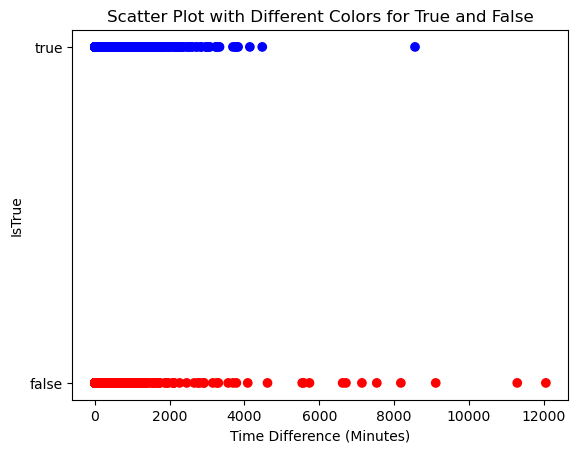

In [14]:
# Create a scatter plot
plt.scatter(filtered_df['TimeDifferenceInMinutes'], filtered_df['IsTrue'], c=filtered_df['IsTrue'].map({'true': 'blue', 'false': 'red'}))

# Add labels and title
plt.xlabel('Time Difference (Minutes)')
plt.ylabel('IsTrue')
plt.title('Scatter Plot with Different Colors for True and False')

# Show the plot
plt.show()